In [1]:
import datetime
import pandas as pd
#pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sco

### 輸入候補ETF資料

In [2]:
start = datetime.datetime(2015, 4, 1)
end = datetime.date.today()

new_tickers = ['IWY', 'JKE', 'VONG', 'IWF', 'SPYG', 'IVW', 'VOOG', 'IAU']

new_data = {}
for ticker in new_tickers:
    new_data[ticker] = pdr.get_data_yahoo(ticker, start, end)

new_p = DataFrame({tic: data['Adj Close'] for tic, data in new_data.items()})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### 計算新增資料日報酬、標準差

In [3]:
new_ret = np.log(new_p / new_p.shift(1))
new_vol = new_ret.rolling(252).std() * np.sqrt(252)

### 繪製新增ETF標準差、報酬分佈

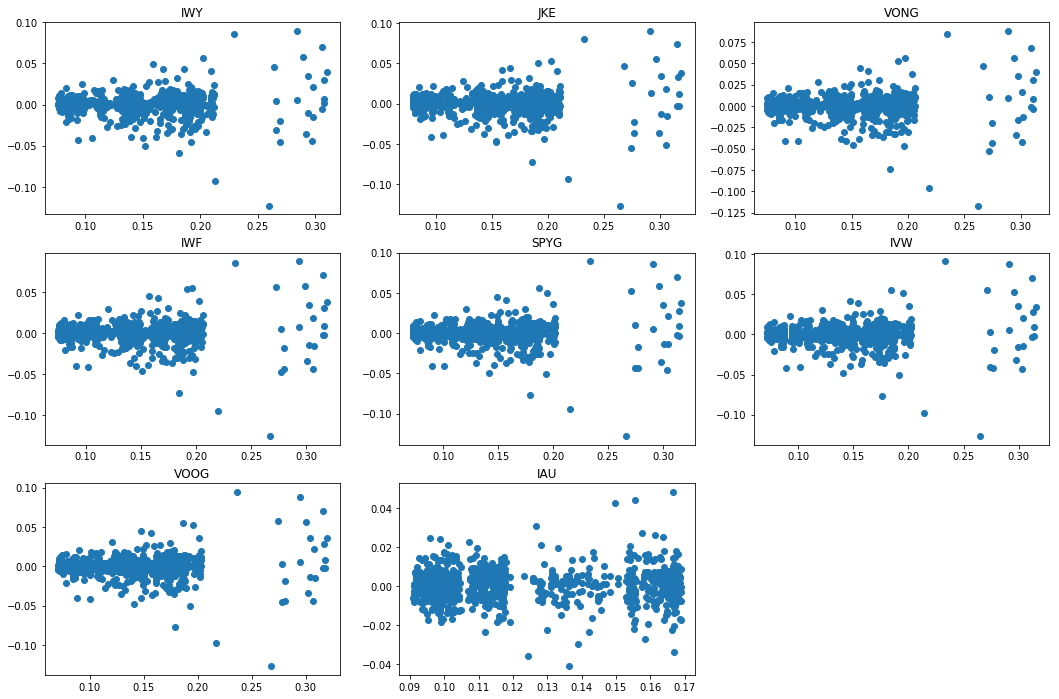

In [4]:
'IWY', 'JKE', 'VONG', 'IWF', 'SPYG', 'IVW', 'VOOG'
plt.figure(figsize = (18, 12))

plt.subplot(3, 3, 1) #nrow, ncol, index
plt.plot(new_vol['IWY'], new_ret['IWY'], 'o')
plt.title('IWY')

plt.subplot(3, 3, 2) #nrow, ncol, index
plt.plot(new_vol['JKE'], new_ret['JKE'], 'o')
plt.title('JKE')

plt.subplot(3, 3, 3) #nrow, ncol, index
plt.plot(new_vol['VONG'], new_ret['VONG'], 'o')
plt.title('VONG')

plt.subplot(3, 3, 4) #nrow, ncol, index
plt.plot(new_vol['IWF'], new_ret['IWF'], 'o')
plt.title('IWF')

plt.subplot(3, 3, 5) #nrow, ncol, index
plt.plot(new_vol['SPYG'], new_ret['SPYG'], 'o')
plt.title('SPYG')

plt.subplot(3, 3, 6) #nrow, ncol, index
plt.plot(new_vol['IVW'], new_ret['IVW'], 'o')
plt.title('IVW')

plt.subplot(3, 3, 7) #nrow, ncol, index
plt.plot(new_vol['VOOG'], new_ret['VOOG'], 'o')
plt.title('VOOG')

plt.subplot(3, 3, 8) #nrow, ncol, index
plt.plot(new_vol['IAU'], new_ret['IAU'], 'o')
plt.title('IAU')

plt.show()

### 將新增ETF加入原本投資組合並計算其報酬及風險

In [5]:
start = datetime.datetime(2015, 4, 1)
end = datetime.date.today()
tickers = ['VTI', 'SCHB', 'SPY', 'VEA', 'SCHF', 'EFA', 'VWO', 'IEMG', 'EEM', 'VGIT', 'VGSH', 'LQD', 'VCIT', 'VCSH', 'SJNK', 'HYS', 'SHYG', 'TIP', 'VNQ', 'IYR', 'ICF']

all_data = {}
for ticker in tickers:
    all_data[ticker] = pdr.get_data_yahoo(ticker, start, end)

price = DataFrame({tic: data['Adj Close'] for tic, data in all_data.items()})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [57]:
price['IAU'] = new_p['IAU']

price.head()

,VTI,SCHB,SPY,VEA,SCHF,EFA,VWO,IEMG,EEM,VGIT,...,TIP,VNQ,IYR,ICF,SPYG,IWY,JKE,IVW,VOOG,IAU
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-31,97.390610,45.798809,186.802124,34.281384,26.504255,55.472553,35.533504,42.452812,35.881935,59.550022,...,104.299110,68.215141,65.815201,85.670471,22.834272,48.348412,113.429405,105.847694,95.246498,11.45
2015-04-01,97.209015,45.644566,186.141541,34.522369,26.662069,55.870205,36.011684,43.041336,36.329014,59.688545,...,105.107117,68.118073,65.806892,85.340065,22.716156,48.133656,112.844215,105.364647,94.686874,11.65
2015-04-02,97.517754,45.798809,186.811188,34.780582,26.890026,56.354305,36.568111,43.612289,36.874439,59.606518,...,104.721481,68.635880,66.246666,86.051682,22.811111,48.311066,113.410240,105.652603,95.162560,11.62
2015-04-06,98.189728,46.089138,188.069000,35.116238,27.170584,56.924850,37.011520,44.192036,37.348339,59.734116,...,105.134682,69.347893,66.910454,86.983521,22.938501,48.637878,114.100922,106.256409,95.619568,11.76
2015-04-07,97.862808,45.962112,187.571274,35.116238,27.153049,56.847057,36.924583,43.972435,37.160561,59.752346,...,105.364227,68.126167,65.823494,85.517982,22.906067,48.553837,113.745979,106.117058,95.433022,11.70


In [58]:
log_ret = np.log(price / price.shift(1))
log_ret.head()

,VTI,SCHB,SPY,VEA,SCHF,EFA,VWO,IEMG,EEM,VGIT,...,TIP,VNQ,IYR,ICF,SPYG,IWY,JKE,IVW,VOOG,IAU
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,-0.001866,-0.003374,-0.003543,0.007005,0.005937,0.007143,0.013367,0.013768,0.012383,0.002323,...,0.007717,-0.001424,-0.000126,-0.003864,-0.005186,-0.004452,-0.005172,-0.004574,-0.005893,0.017316
2015-04-02,0.003171,0.003374,0.003591,0.007452,0.008514,0.008627,0.015333,0.013178,0.014902,-0.001375,...,-0.003676,0.007573,0.006661,0.008304,0.004171,0.003679,0.005003,0.002729,0.005011,-0.002578
2015-04-06,0.006867,0.006319,0.006711,0.009604,0.010379,0.010073,0.012053,0.013206,0.012770,0.002138,...,0.003938,0.010320,0.009970,0.010771,0.005569,0.006742,0.006072,0.005699,0.004791,0.011976
2015-04-07,-0.003335,-0.002760,-0.002650,0.000000,-0.000646,-0.001368,-0.002352,-0.004982,-0.005040,0.000305,...,0.002181,-0.017774,-0.016378,-0.016992,-0.001415,-0.001729,-0.003116,-0.001312,-0.001953,-0.005115


In [59]:
log_ret.corr() 

,VTI,SCHB,SPY,VEA,SCHF,EFA,VWO,IEMG,EEM,VGIT,...,TIP,VNQ,IYR,ICF,SPYG,IWY,JKE,IVW,VOOG,IAU
VTI,1.000000,0.998955,0.997296,0.896288,0.897880,0.890264,0.815459,0.821693,0.816516,-0.438262,...,-0.108809,0.762565,0.777731,0.732817,0.978514,0.965975,0.962729,0.979992,0.979465,-0.048377
SCHB,0.998955,1.000000,0.996949,0.894198,0.895964,0.888267,0.811937,0.818453,0.813356,-0.440728,...,-0.112969,0.765895,0.780244,0.736551,0.978837,0.966241,0.962240,0.980013,0.979917,-0.046105
SPY,0.997296,0.996949,1.000000,0.894306,0.896006,0.889017,0.814106,0.820538,0.815066,-0.442389,...,-0.121822,0.753032,0.768134,0.726737,0.981916,0.971328,0.963909,0.983843,0.983143,-0.052695
VEA,0.896288,0.894198,0.894306,1.000000,0.997745,0.996186,0.886127,0.893706,0.888778,-0.385718,...,-0.032936,0.679117,0.695698,0.644799,0.862440,0.846465,0.853381,0.866360,0.862914,0.022237
SCHF,0.897880,0.895964,0.896006,0.997745,1.000000,0.996046,0.885462,0.893274,0.889045,-0.383543,...,-0.031062,0.681033,0.697917,0.647173,0.863336,0.847221,0.853382,0.866928,0.864053,0.022014
EFA,0.890264,0.888267,0.889017,0.996186,0.996046,1.000000,0.873547,0.878986,0.874496,-0.389912,...,-0.044026,0.670176,0.687026,0.636875,0.857108,0.841204,0.847274,0.860800,0.857529,0.011004
VWO,0.815459,0.811937,0.814106,0.886127,0.885462,0.873547,1.000000,0.993010,0.992669,-0.333788,...,-0.005576,0.601962,0.617853,0.569403,0.796012,0.782133,0.787041,0.797972,0.795285,0.055338
IEMG,0.821693,0.818453,0.820538,0.893706,0.893274,0.878986,0.993010,1.000000,0.997105,-0.335710,...,-0.010281,0.610196,0.625678,0.577966,0.803070,0.790448,0.795452,0.805790,0.803082,0.059721
EEM,0.816516,0.813356,0.815066,0.888778,0.889045,0.874496,0.992669,0.997105,1.000000,-0.333539,...,-0.006583,0.601543,0.617306,0.569319,0.798477,0.786014,0.791007,0.800555,0.798104,0.059484
VGIT,-0.438262,-0.440728,-0.442389,-0.385718,-0.383543,-0.389912,-0.333788,-0.335710,-0.333539,1.000000,...,0.703195,-0.124322,-0.127567,-0.114774,-0.409779,-0.407502,-0.401770,-0.411940,-0.409247,0.403841


In [60]:
weights = np.random.random(len(price.columns))
weights /= np.sum(weights)

In [61]:
def statistics(weights):
    weights = np.array(weights)
    port_ret = np.sum(log_ret.mean()*weights) * 252
    port_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
    
    return np.array([port_ret, port_vol, port_ret/port_vol])

def min_var(weights):
    return statistics(weights)[1]

In [62]:
noa = len(price.columns)
bnds = tuple((0,1) for x in range(noa))
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

opt_vol = sco.minimize(min_var, noa* [1./noa,], method= 'SLSQP', bounds = bnds, constraints = cons)

In [63]:
target_returns = np.linspace(0.0, 0.08, 50)
target_vol = []

cnt = 0
for tar in target_returns:
    cons = ({'type':'eq','fun':lambda x:statistics(x)[0]-tar},{'type':'eq','fun':lambda x:np.sum(x)-1})
    ret = sco.minimize(min_var, noa*[1./noa,],method = 'SLSQP', bounds = bnds, constraints = cons)
    target_vol.append(ret['fun'])
    cnt += 1
    print(cnt)
target_vol = np.array(target_vol)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


### 匯入原本投資組合資料（以利後面效率前緣改善的比較）

In [20]:
import import_ipynb

importing Jupyter notebook from EF_final.ipynb
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of

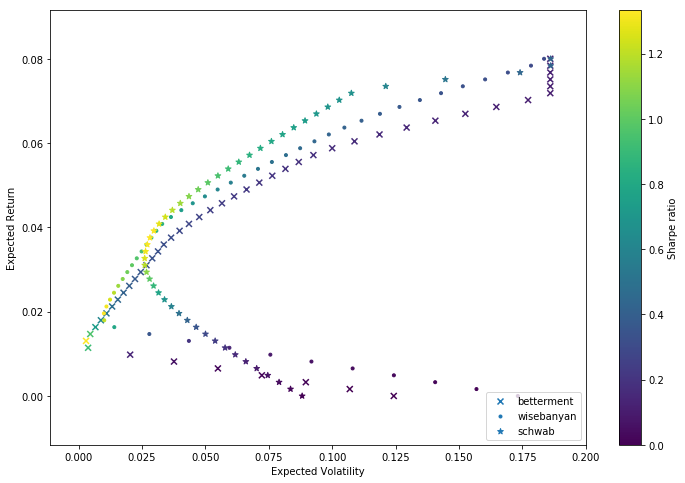

In [21]:
from EF_final import target_vol_wise,target_returns

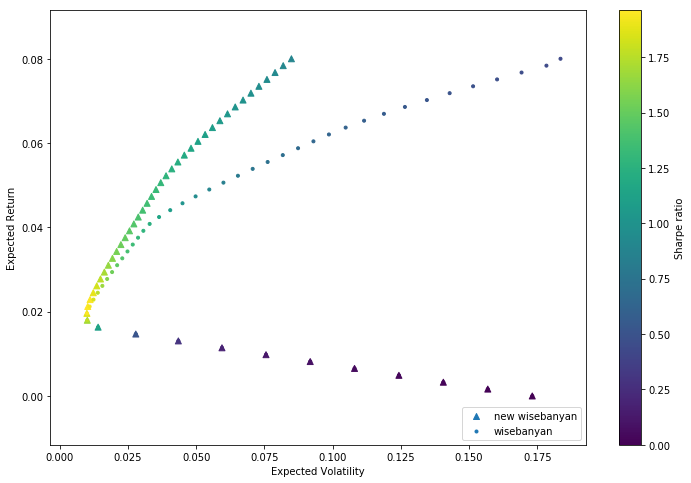

In [64]:
plt.figure(figsize=(12, 8))
plt.scatter(target_vol,target_returns, c = target_returns/target_vol, marker = '^', label = 'new wisebanyan')
plt.scatter(target_vol_wise,target_returns, c = target_returns/target_vol_wise, marker = '.', label = 'wisebanyan')


#plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label = 'Sharpe ratio')
plt.legend(loc = 'lower right')